UTBK SBMPTN is the annual college entrance exam held by and for state universities in Indonesia. This data was collected from a ranking site where exam takers could submit their score in order to gauge how well they did in comparison to others.

There are about 147 thousand samples (out of 1.1 million total scores) and this data is not indicative of the whole 1.1 million dataset as it is collected from a third-party sources (with maybe some invalid data strewn in). This dataset also contains the major picked by those exam-takers.

# Exam Content

The testing part of UTBK SBMPTN was held in 'waves' and 'batches'. There are 2 'waves' of examinations and an exam-taker could take part in both 'waves' and thus have 2 scores for the examination.

As for the content of the examination, there are two types of examination: one for exam-taker aiming to study in a science-related major and one for a humanities-related major. The first part of these two examinations are general knowledge and reasoning tests covering:

    KPU - Kemampuan Penalaran Umum - General Reasoning
    Kua - Kemampuan Kuantitatif - Quantitative Skills
    PPU - Pengetahuan & Pemahaman Umum - General Knowledge & Understanding
    KMB - Kemampuan Memahami Bacaan & Menulis - Reading Comprehension & Writing

The second part differs according to the exaamination types.

Science-type examinations

    Mathematics (mat)
    Physics (fis)
    Chemistry (kim)
    Biology (bio)

Humanities-type examinations

    Mathematics (mat)
    Geography (geo)
    History (sej)
    Sociology (sos)
    Economy (eko)

Admission Process

Each student was given their examination result before they could register for admission. In this process, they could pick a maximum of two majors in various different state universities (data also given). It is assumed, but not known for certain, that the consideration for admission is almost wholly based on examination scores but it is not known what is the ranking system used for ranking the scores(weighted average, etc).
Useful Resources

    Official SImple Descriptive Statistics
    Leaked Passing Grade (top 500 science majors)


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import squarify 
import plotly.express as px
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

In [18]:
majors = pd.read_csv('../College-Entrance-Examination---ML/data/majors.csv')

In [19]:
majors = majors.drop('Unnamed: 0', axis =1)

In [20]:
majors[:5]

,id_major,id_university,type,major_name,capacity
0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1111022,111,science,TEKNIK SIPIL,64
2,1111037,111,science,TEKNIK MESIN,48
3,1111045,111,science,TEKNIK KIMIA,48
4,1111053,111,science,ARSITEKTUR,48


In [21]:
humanities = pd.read_csv("../College-Entrance-Examination---ML/data/score_humanities.csv").drop('Unnamed: 0',axis =1)

In [22]:
humanities[:3]

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574


In [23]:
humanities.dropna(inplace=True)

In [24]:
sciences = pd.read_csv("../College-Entrance-Examination---ML/data/score_science.csv").drop('Unnamed: 0',axis =1)

In [25]:
sciences[:3]

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668


In [26]:
sciences.dropna(inplace=True)

In [27]:
universities  = pd.read_csv("../College-Entrance-Examination---ML/data/universities.csv").drop('Unnamed: 0',axis =1)

In [28]:
universities.head()

,id_university,university_name
0,111,UNIVERSITAS SYIAH KUALA
1,112,UNIVERSITAS MALIKUSSALEH
2,113,UNIVERSITAS TEUKU UMAR
3,114,UNIVERSITAS SAMUDRA
4,115,ISBI ACEH


# Some Exploratory Data Analysis

In [29]:
# the number of majors available
majors.major_name.nunique()

854

In [30]:
# How many university
universities.university_name.nunique()

85

Science-type examinations

    Mathematics (mat)
    Physics (fis)
    Chemistry (kim)
    Biology (bio)

Humanities-type examinations

    Mathematics (mat)
    Geography (geo)
    History (sej)
    Sociology (sos)
    Economy (eko)

In [31]:
[i for i in humanities]

['id_first_major',
 'id_first_university',
 'id_second_major',
 'id_second_university',
 'id_user',
 'score_eko',
 'score_geo',
 'score_kmb',
 'score_kpu',
 'score_kua',
 'score_mat',
 'score_ppu',
 'score_sej',
 'score_sos']

In [32]:
[i for i in sciences]

['id_first_major',
 'id_first_university',
 'id_second_major',
 'id_second_university',
 'id_user',
 'score_bio',
 'score_fis',
 'score_kim',
 'score_kmb',
 'score_kpu',
 'score_kua',
 'score_mat',
 'score_ppu']

In [33]:
sciences.rename({'score_kpu':'gen_reasoning'}, axis =1, inplace=True)
sciences.rename({'score_kua':'quan_skills'}, axis =1, inplace=True)
sciences.rename({'score_ppu':'gen_know'}, axis =1, inplace=True)
sciences.rename({'score_kmb':'read_write'}, axis =1, inplace=True)

In [34]:
sciences

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,read_write,gen_reasoning,quan_skills,score_mat,gen_know
0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86565,1411161,141,1421147,142,344111,516,412,376,546,523,490,549,520
86566,3561262,356,3571055,357,344125,334,634,435,613,461,390,399,554
86567,3531182,353,3561022,356,344127,316,717,421,474,494,483,327,554
86568,1121094,112,1221095,122,344151,592,451,583,437,447,485,508,492


In [35]:
humanities.rename({'score_kpu':'gen_reasoning'}, axis =1, inplace=True)
humanities.rename({'score_kua':'quan_skills'}, axis =1, inplace=True)
humanities.rename({'score_ppu':'gen_know'}, axis =1, inplace=True)
humanities.rename({'score_kmb':'read_write'}, axis =1, inplace=True)

In [36]:
humanities.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,read_write,gen_reasoning,quan_skills,score_mat,gen_know,score_sej,score_sos
0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [37]:
# lest do an aggreagate for the sciences
sciences['total_score'] = sciences.iloc[:,[5,6,7,8,9,10,11,12]].sum(axis=1)

In [38]:
humanities['total_score'] = humanities.iloc[:,[5,6,7,8,9,10,11,12,13]].sum(axis=1)

In [39]:
# we can do average of scores

In [40]:
sciences['avg_score']= round(sciences.total_score/8)

In [41]:
sciences.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,read_write,gen_reasoning,quan_skills,score_mat,gen_know,total_score,avg_score
0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400,3200,400.0
1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562,5459,682.0
2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668,5189,649.0
3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573,5325,666.0
4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370,4213,527.0


In [42]:
humanities['avg_score'] = round(humanities.total_score/9)

In [43]:
humanities.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,read_write,gen_reasoning,quan_skills,score_mat,gen_know,score_sej,score_sos,total_score,avg_score
0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676,5493,610.0
1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686,5945,661.0
2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574,4345,483.0
3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589,5356,595.0
4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674,5806,645.0


# lets take statitistics of science

In [44]:
sciences.iloc[5:9]

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,read_write,gen_reasoning,quan_skills,score_mat,gen_know,total_score,avg_score
5,6111014,611,3331021,333,29,516,503,410,717,614,641,479,512,4392,549.0
6,3411041,341,3411122,341,33,675,584,578,670,647,706,478,590,4928,616.0
7,3531031,353,3531197,353,37,641,567,600,627,553,597,529,691,4805,601.0
8,7111196,711,7111092,711,39,440,410,554,645,587,502,649,447,4234,529.0


In [45]:
sci_stats = sciences.drop(["id_first_major","id_first_university","id_second_major","id_second_university","id_user"],axis=1).describe()

In [46]:
hum_stats = humanities.drop(["id_first_major","id_first_university","id_second_major","id_second_university","id_user"],axis=1).describe()

In [47]:
sci_stats

,score_bio,score_fis,score_kim,read_write,gen_reasoning,quan_skills,score_mat,gen_know,total_score,avg_score
count,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000
mean,537.140522,539.335312,544.598036,565.798094,569.942879,569.147141,529.489303,544.597158,4400.048446,550.005937
std,96.596624,102.293095,112.595368,95.166847,91.224084,111.385700,99.464651,87.436377,477.151100,59.644949
min,245.000000,252.000000,213.000000,198.000000,193.000000,266.000000,219.000000,219.000000,2400.000000,300.000000
25%,471.000000,468.000000,465.000000,500.000000,508.000000,489.000000,463.000000,487.000000,4063.000000,508.000000
50%,531.000000,531.000000,536.000000,565.000000,571.000000,563.000000,520.000000,547.000000,4369.000000,546.000000
75%,597.000000,604.000000,616.000000,632.000000,633.000000,645.000000,586.000000,604.000000,4708.000000,588.000000
max,1000.000000,1070.000000,1044.000000,908.000000,881.000000,922.000000,1123.000000,842.000000,7084.000000,886.000000


C:\Users\godwi\AppData\Local\Temp\ipykernel_5916\116836782.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


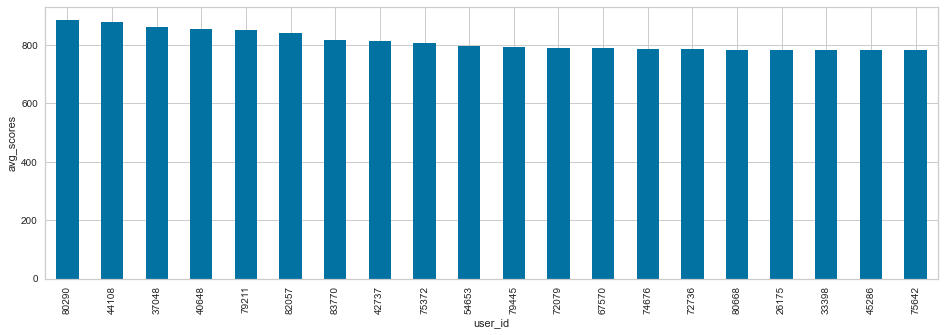

In [48]:
fig, ax = plt.subplots(figsize =(16,5))
sciences.avg_score.nlargest(20).plot(kind = 'bar')
plt.xlabel('user_id')
plt.ylabel('avg_scores')
fig.show()

# lets do a KMeans for the sciences

In [49]:
X_sci = sciences.iloc[:,[5,6,7,8,9,10,11,12]]

In [50]:
X_sci 

,score_bio,score_fis,score_kim,read_write,gen_reasoning,quan_skills,score_mat,gen_know
0,400,400,400,400,400,400,400,400
1,816,666,651,678,685,706,695,562
2,562,839,624,700,781,464,551,668
3,700,669,692,679,692,813,507,573
4,461,619,441,593,563,500,666,370
...,...,...,...,...,...,...,...,...
86565,516,412,376,546,523,490,549,520
86566,334,634,435,613,461,390,399,554
86567,316,717,421,474,494,483,327,554
86568,592,451,583,437,447,485,508,492


In [51]:
X_hum = humanities.iloc[:,[5,6,7,8,9,10,11,12,13]]

In [52]:
X_hum

,score_eko,score_geo,read_write,gen_reasoning,quan_skills,score_mat,gen_know,score_sej,score_sos
0,778,486,679,594,643,686,559,392,676
1,579,631,710,700,810,656,638,535,686
2,600,481,314,432,522,494,461,467,574
3,559,563,646,638,591,538,585,647,589
4,838,734,654,613,690,315,628,660,674
...,...,...,...,...,...,...,...,...,...
61197,521,497,498,522,573,575,541,599,459
61198,638,464,548,576,541,492,548,435,459
61199,491,601,567,486,492,476,518,409,434
61200,573,544,634,672,527,526,504,696,463


In [53]:
pca = PCA(n_components=None)

In [54]:
pca.fit_transform(X_sci)

array([[-416.19341461,    4.03007898,  -67.70870383, ...,   33.58867971,
          18.74724608,   -9.74454444],
       [ 359.77101439,   70.96666958,   50.12359108, ...,   61.39088904,
          39.23024118,  -11.91338577],
       [ 250.16165692,  -19.90639871,  -47.79374598, ..., -221.85945356,
          12.01913251,  -85.82198396],
       ...,
       [-205.3204846 ,  -44.3478463 , -156.77347724, ...,  -23.17001716,
         -42.6455971 ,    9.48495302],
       [-143.66305195,   70.27587309,  -81.00703223, ...,   18.29928449,
         -44.77337683,   19.41794707],
       [-171.70545976,   -6.57534479,    4.98961764, ...,  -55.73936942,
         -14.06021096,  -17.57293935]])

In [55]:
pca.explained_variance_ratio_.cumsum()

array([0.37716423, 0.50282146, 0.6110307 , 0.70984931, 0.79798735,
       0.88551636, 0.95613889, 1.        ])

In [56]:
sci_pca = pca.fit_transform(X_sci)

In [57]:
sci_pca = pd.DataFrame(sci_pca, columns=["pca1",'pca2','pca3','pca4','pca5','pca6','pca7','pca8'])

In [58]:
wcss= []
for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(sci_pca)
    wcss_iter= km.inertia_
    wcss.append(wcss_iter)

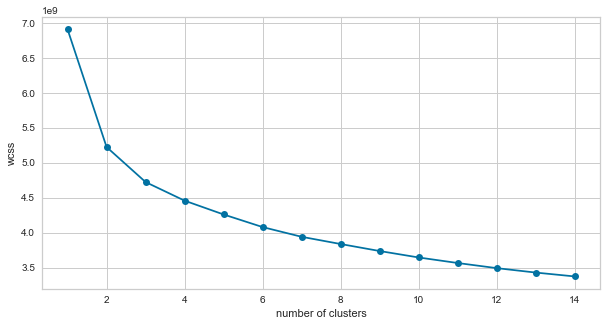

In [59]:
plt.subplots(figsize = (10,5))
plt.plot(range(1,15), wcss, marker ='o')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


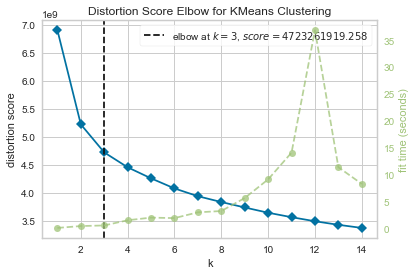

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [141]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,15)).fit(X_sci)
visualizer.show()

In [179]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit_transform(X_sci )
pca_km = pd.concat([X_sci , pd.DataFrame({'clusters' : kmeans.labels_})],axis = 1)
pca_km

,score_bio,score_fis,score_kim,read_write,gen_reasoning,quan_skills,score_mat,gen_know,clusters
0,400,400,400,400,400,400,400,400,1
1,816,666,651,678,685,706,695,562,0
2,562,839,624,700,781,464,551,668,0
3,700,669,692,679,692,813,507,573,0
4,461,619,441,593,563,500,666,370,1
...,...,...,...,...,...,...,...,...,...
86565,516,412,376,546,523,490,549,520,1
86566,334,634,435,613,461,390,399,554,1
86567,316,717,421,474,494,483,327,554,1
86568,592,451,583,437,447,485,508,492,1


# ploting the clusters

In [160]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
sci_tsne  = tsne.fit_transform(X_sci)

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 86570 samples in 0.158s...
[t-SNE] Computed neighbors for 86570 samples in 62.952s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86570
[t-SNE] Computed conditional probabilities for sample 2000 / 86570
[t-SNE] Computed conditional probabilities for sample 3000 / 86570
[t-SNE] Computed conditional probabilities for sample 4000 / 86570
[t-SNE] Computed conditional probabilities for sample 5000 / 86570
[t-SNE] Computed conditional probabilities for sample 6000 / 86570
[t-SNE] Computed conditional probabilities for sample 7000 / 86570
[t-SNE] Computed conditional probabilities for sample 8000 / 86570
[t-SNE] Computed conditional probabilities for sample 9000 / 86570
[t-SNE] Computed conditional probabilities for sample 10000 / 86570
[t-SNE] Computed conditional probabilities for sample 11000 / 86570
[t-SNE] Computed conditional probabilities for sample 12000 / 86570
[t-SNE] Computed conditional probabilities for s

In [168]:
sci_tsne 

array([[-39.823914  , -20.511732  ],
       [ 28.756397  ,  31.188747  ],
       [-12.678052  ,  34.72202   ],
       ...,
       [-25.037931  ,  -0.82886016],
       [-30.099018  ,  -8.304753  ],
       [ -9.58197   , -23.268293  ]], dtype=float32)

In [169]:
sci_tsne = pd.DataFrame(sci_tsne, columns=(['tsne1','tsne2']))

In [171]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit_transform(sci_tsne)
tsne_km= pd.concat([sci_tsne , pd.DataFrame({'clusters' : kmeans.labels_})],axis = 1)
tsne_km


,tsne1,tsne2,clusters
0,-39.823914,-20.511732,2
1,28.756397,31.188747,1
2,-12.678052,34.722019,1
3,15.658614,39.414406,1
4,-2.075704,-38.817299,0
...,...,...,...
86565,-14.188739,-36.319977,2
86566,-10.629175,-22.688194,2
86567,-25.037931,-0.828860,2
86568,-30.099018,-8.304753,2


In [172]:
tsne_km['group'] = tsne_km.clusters.apply(lambda x: 'high' if x==2 else 'mid' if x ==1 else 'low')

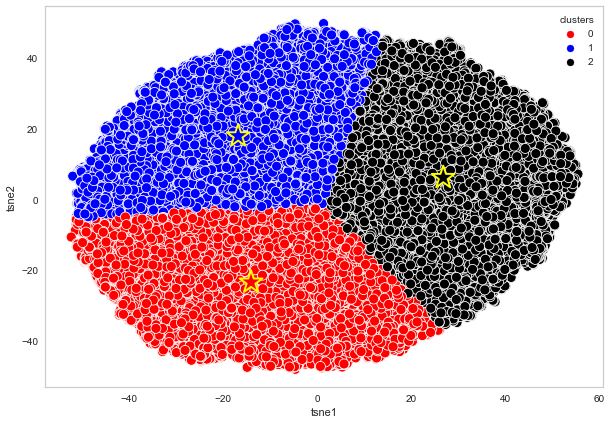

In [164]:
fig,ax=plt.subplots(figsize = (10,7))
sns.scatterplot(data = tsne_km, x= 'tsne1', y= 'tsne2', palette=['red','blue','black'], hue = 'clusters', s = 100)
sns.scatterplot(x= kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                hue= range(3), palette=['red','blue','black'], s=580, ec='yellow', marker = "*",  legend = False, ax=ax)
plt.grid(False)
plt.show()

In [200]:
sciences.head()

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,read_write,gen_reasoning,quan_skills,score_mat,gen_know,total_score,avg_score
0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400,3200,400.0
1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562,5459,682.0
2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668,5189,649.0
3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573,5325,666.0
4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370,4213,527.0


In [232]:
# concat the sciences wiht the clusters
sci_group = pd.concat([sciences.iloc[:,[0,1,2,3,4,12,13,14]], pca_km],axis =1)
sci_group = sci_group.iloc[:,[0,1,2,3,4,6,7,16]]

In [233]:
sci_group.max()

id_first_major          9211352.0
id_first_university         921.0
id_second_major         9211352.0
id_second_university        921.0
id_user                  344192.0
total_score                7084.0
avg_score                   886.0
clusters                      2.0
dtype: float64

In [243]:
sci_group['groups'] = sci_group.clusters.apply(lambda x:'high' if x ==0 else 'mid' if x ==2 else 'low')

In [245]:
sci_group.sort_values('clusters')

,id_first_major,id_first_university,id_second_major,id_second_university,id_user,total_score,avg_score,clusters,groups
74512,3811165,381,3851046,385,296808,4594,574.0,0,high
60428,3631136,363,3621103,362,241256,4978,622.0,0,high
71512,1711036,171,1711083,171,286220,5024,628.0,0,high
13071,3331172,333,3551194,355,62932,4626,578.0,0,high
60427,3721031,372,1711013,171,241250,4854,607.0,0,high
...,...,...,...,...,...,...,...,...,...
57209,3331117,333,3331102,333,229209,4304,538.0,2,mid
25837,3511131,351,3531271,353,111988,4730,591.0,2,mid
25836,5111045,511,5111285,511,111985,4203,525.0,2,mid
57187,3531197,353,3531031,353,229154,4674,584.0,2,mid


In [246]:
tsne_km.group.value_counts()

mid     31887
high    29278
low     25405
Name: group, dtype: int64

In [247]:
pca_km.clusters.value_counts()

2    37444
1    29578
0    19548
Name: clusters, dtype: int64

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


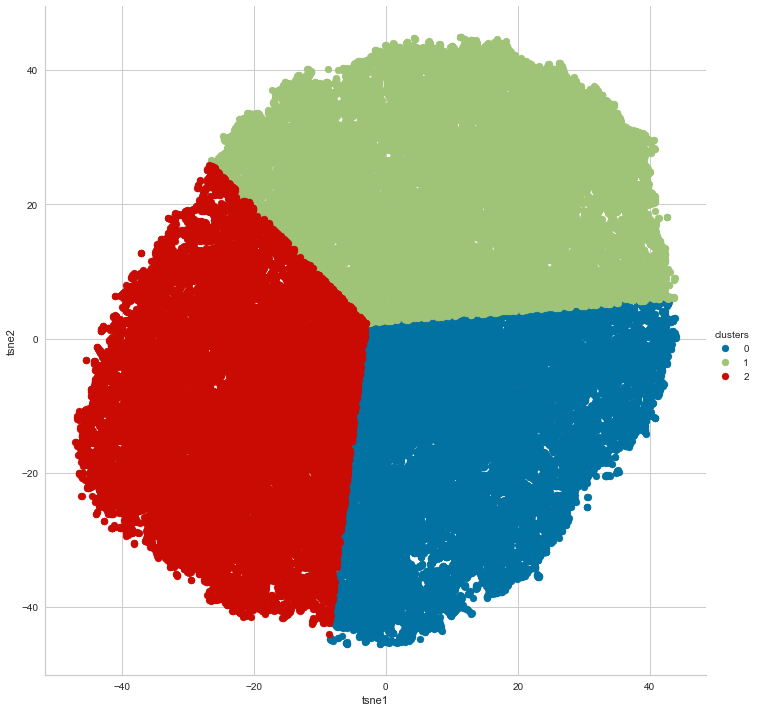

In [248]:
grid = sns.FacetGrid(tsne_km , size = 10, hue ='clusters')
grid.map(plt.scatter, 'tsne1', 'tsne2').add_legend()

In [253]:
majors[majors.type == 'science']

,id_major,id_university,type,major_name,capacity
0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1111022,111,science,TEKNIK SIPIL,64
2,1111037,111,science,TEKNIK MESIN,48
3,1111045,111,science,TEKNIK KIMIA,48
4,1111053,111,science,ARSITEKTUR,48
...,...,...,...,...,...
1704,9211313,921,science,PENDIDIKAN FISIKA,16
1705,9211321,921,science,ILMU TANAH,24
1706,9211336,921,science,NUTRISI DAN TEKNOLOGI PAKAN TERNAK,16
1707,9211344,921,science,TEKNIK PERTANIAN DAN BIOSISTEM,16


In [ ]:
sciences.roll